In [1]:
import sys
import os
import pandas as pd
from ema_workbench.analysis.parcoords import ParallelAxes, get_limits
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 5]
sys.path.append("..")

In [2]:
import rbf_functions

In [3]:
rbfs = [
    rbf_functions.original_rbf,
    rbf_functions.squared_exponential_rbf,
    rbf_functions.inverse_quadratic_rbf,
    rbf_functions.inverse_multiquadric_rbf,
    rbf_functions.exponential_rbf,
    rbf_functions.matern32_rbf,
    rbf_functions.matern52_rbf,
]

# Load reference set for each RBF
pareto_sets = {}
for entry in rbfs:
    name = entry.__name__
    output_dir = f"./refsets/"
    results = pd.read_csv(output_dir + name + "_refset.csv")
    results["max_p"] = 2.5 - results["max_p"]  ## swap for the max P value
    pareto_sets[name] = results

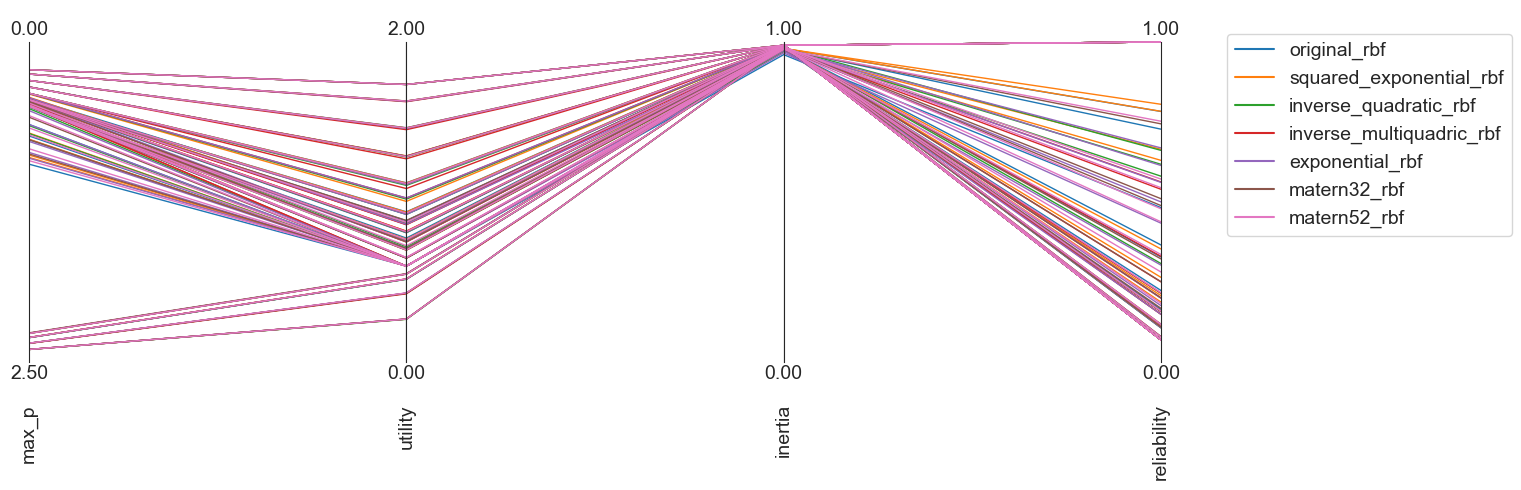

In [4]:
limits = get_limits(pd.concat(pareto_sets.values()))
limits.loc[0] = [0, 0, 0, 0]
limits.loc[1] = [2.5, 2, 1, 1]
axes = ParallelAxes(limits)

sns.color_palette()

for (k, v), c in zip(pareto_sets.items(), sns.color_palette()):
    axes.plot(v, label=k, lw=1, color=c, alpha=1)

axes.invert_axis("max_p")
axes.legend()

# plt.show()

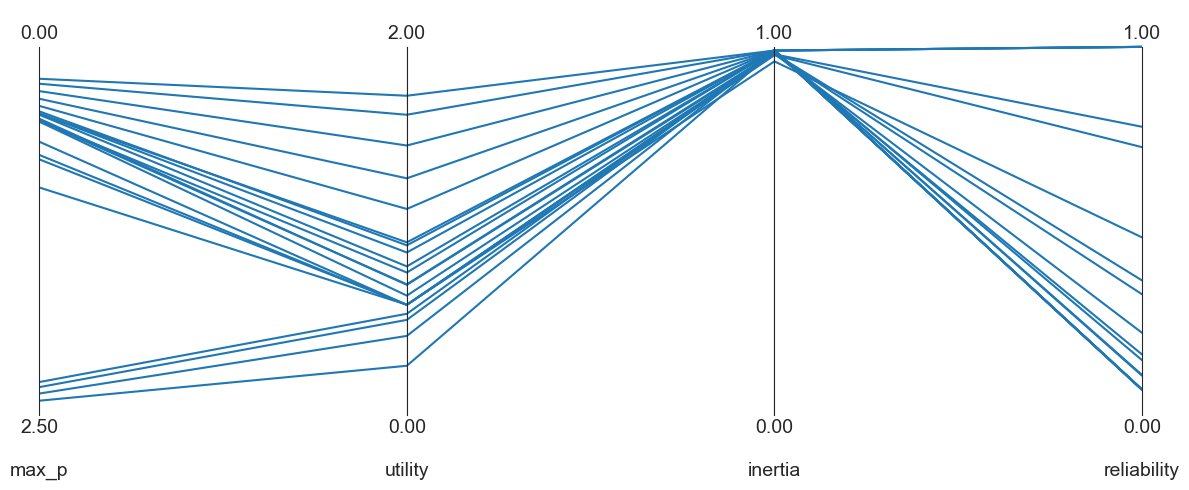

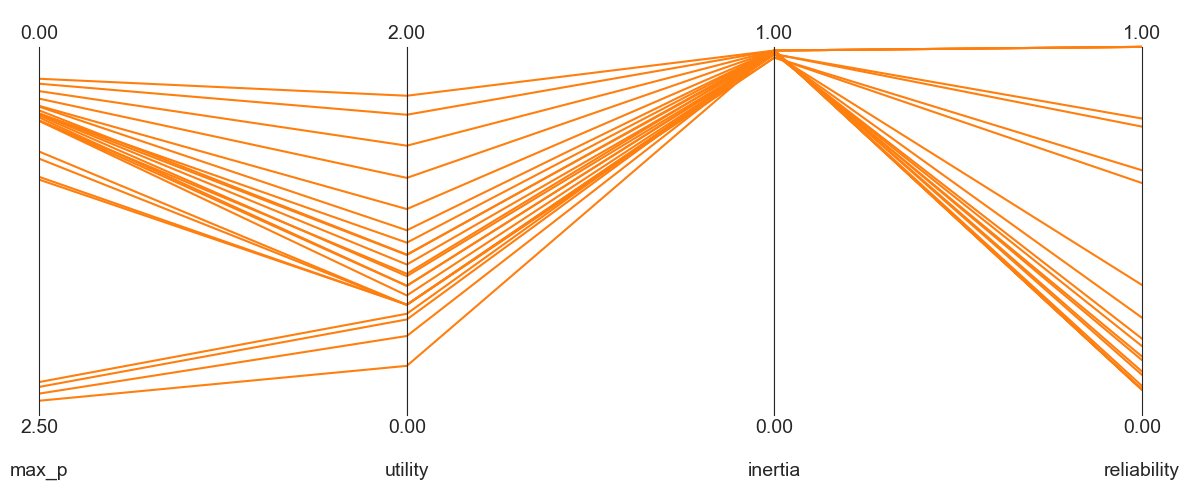

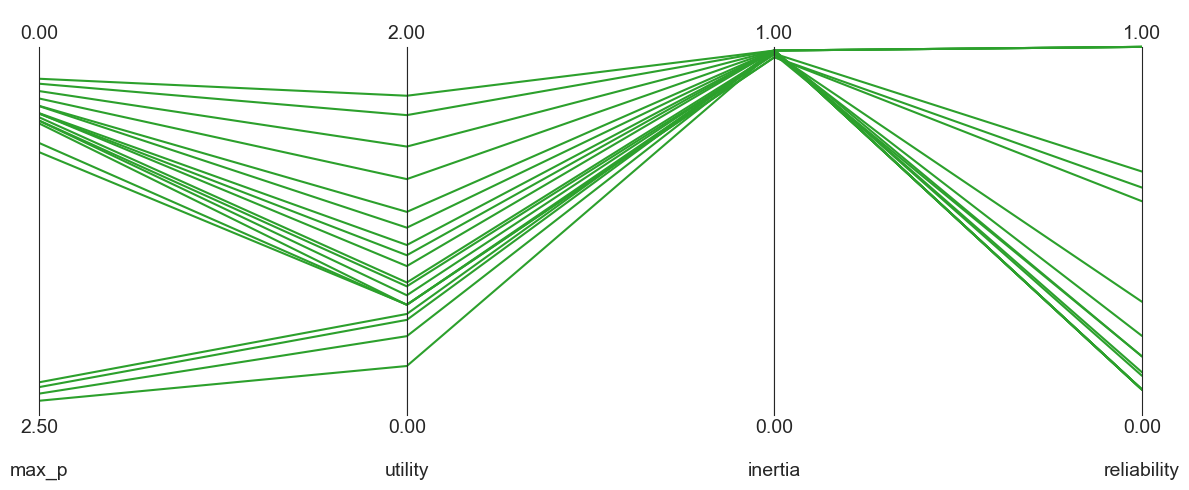

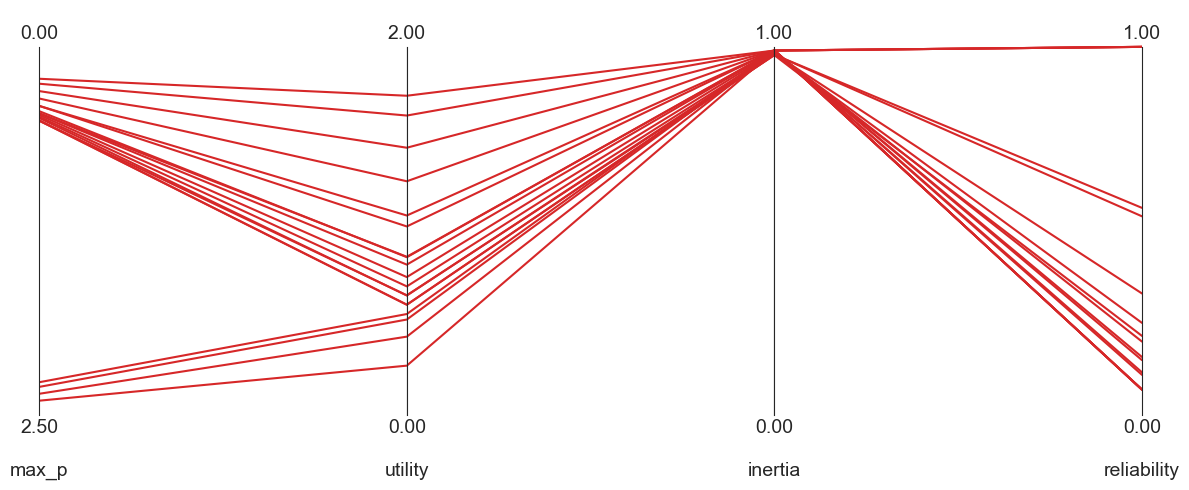

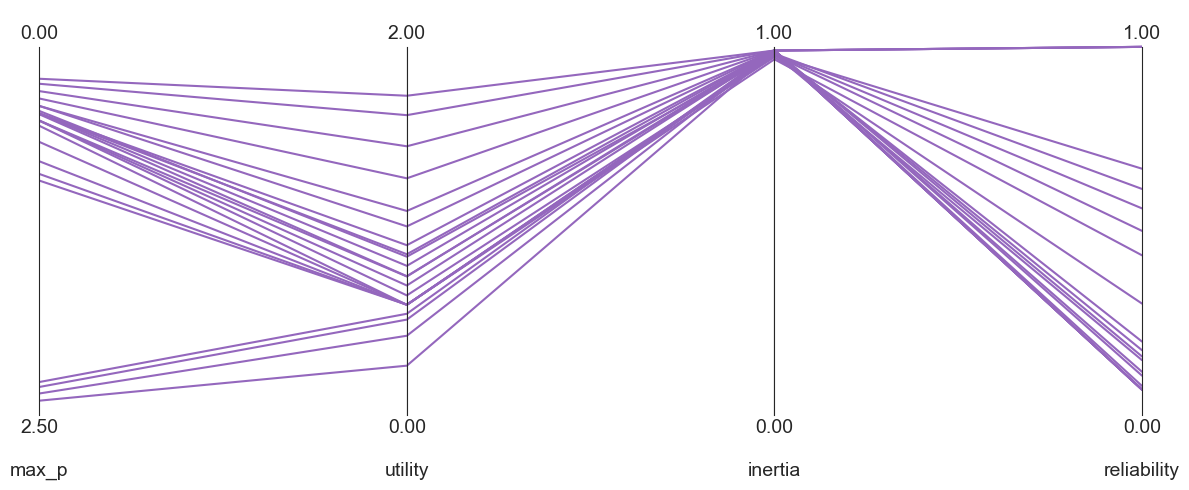

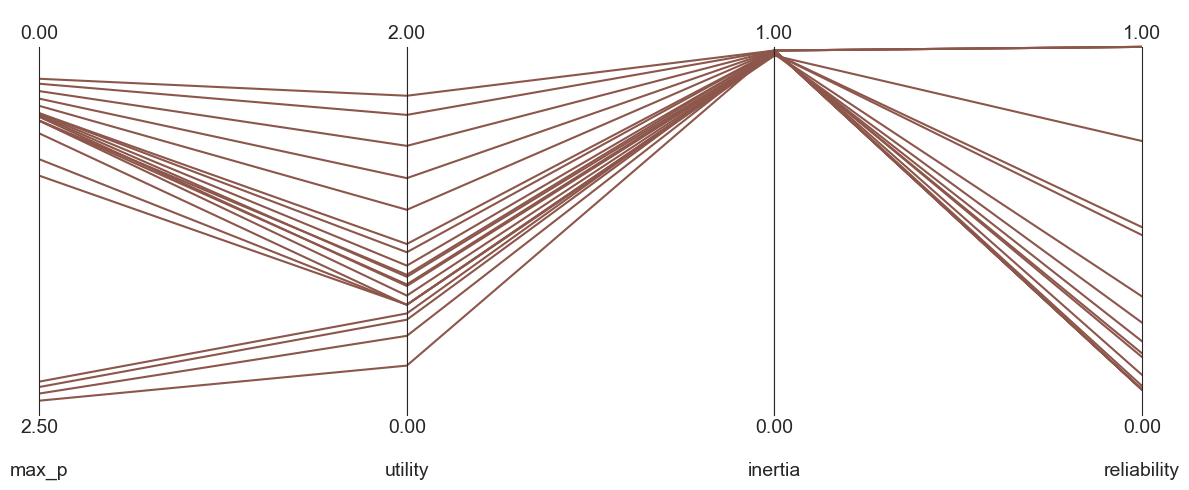

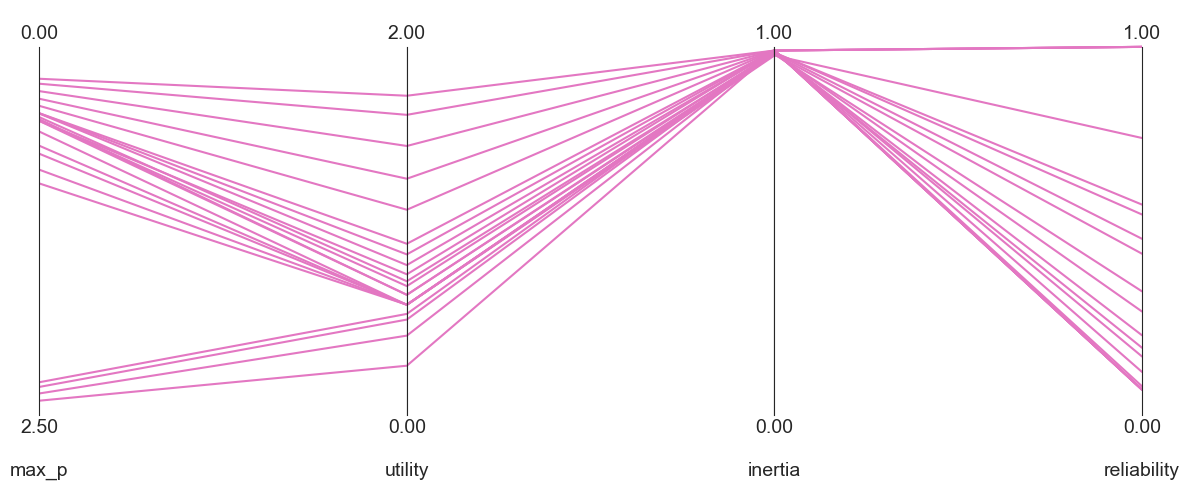

In [5]:
import os

limits = get_limits(pd.concat(pareto_sets.values()))
limits.loc[0] = [0, 0, 0, 0]
limits.loc[1] = [2.5, 2, 1, 1]

for (k, v), c in zip(pareto_sets.items(), sns.color_palette()):
    directory = os.path.join(f"../figs/{k}")
    if not os.path.exists(directory):
        os.mkdir(directory)

    axes = ParallelAxes(limits, rot=0)
    axes.plot(v, label=k, lw=1.5, color=c, alpha=1)

    axes.invert_axis("max_p")
    plt.savefig(f"../figs/{k}/{k}_parcoords_compare.png")
    plt.savefig(f"../figs/{k}/{k}_parcoords_compare.pdf")

plt.show()

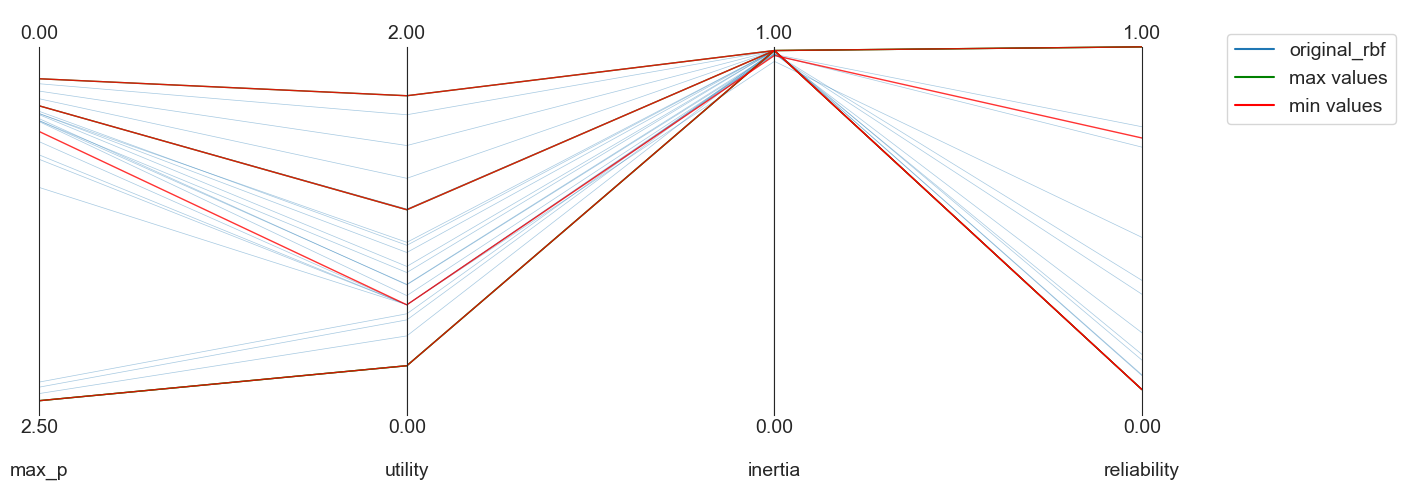

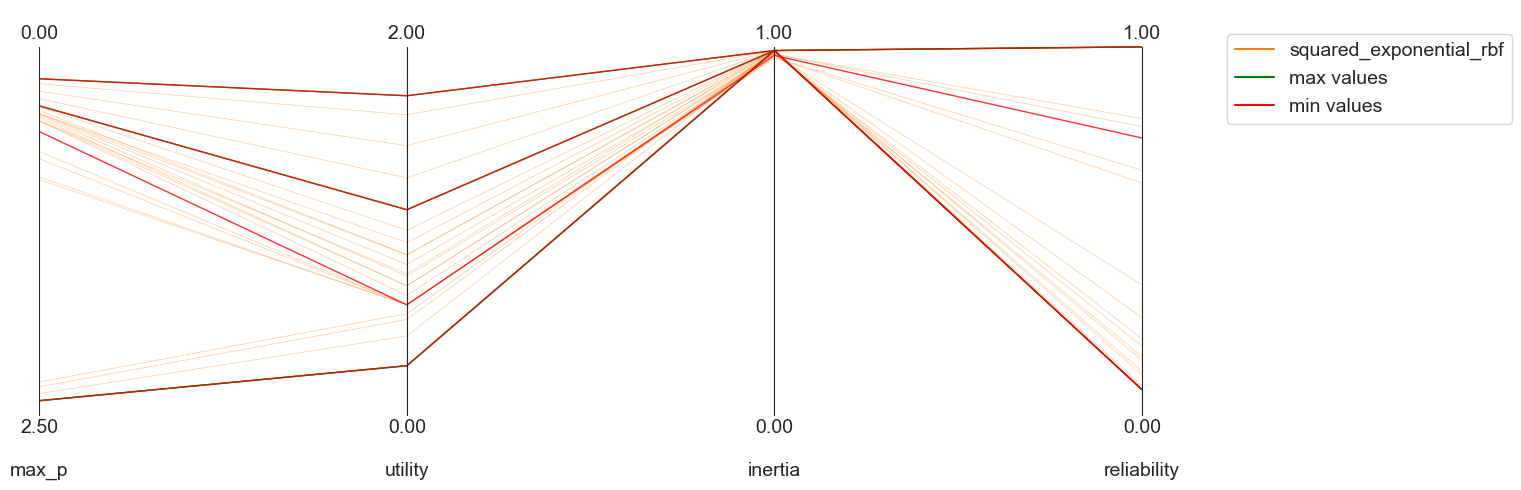

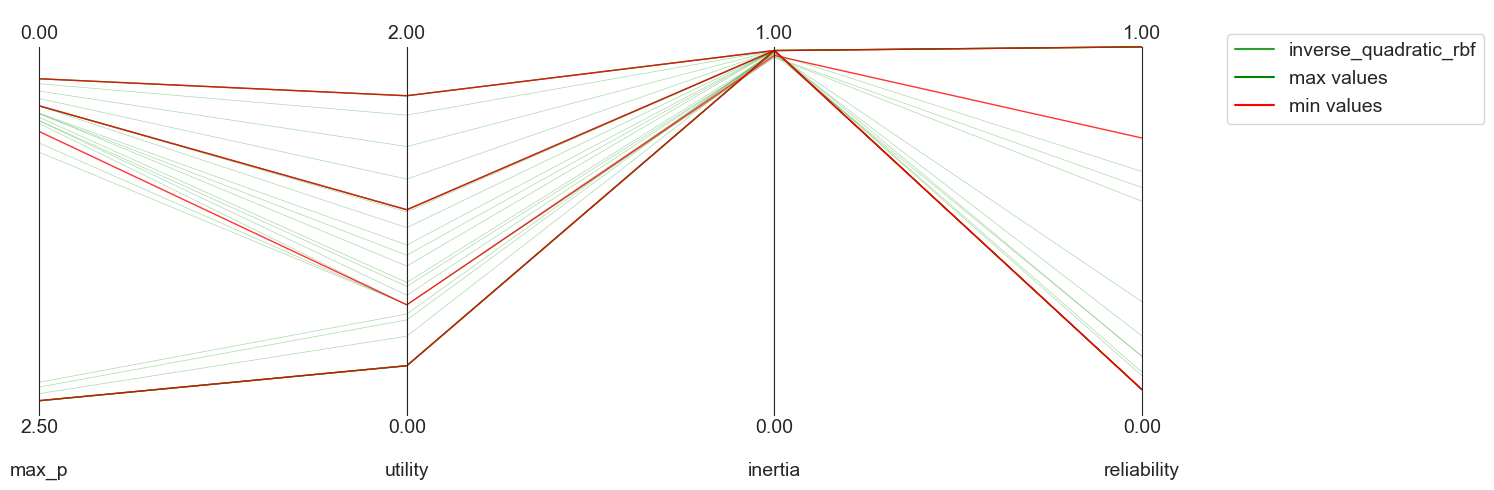

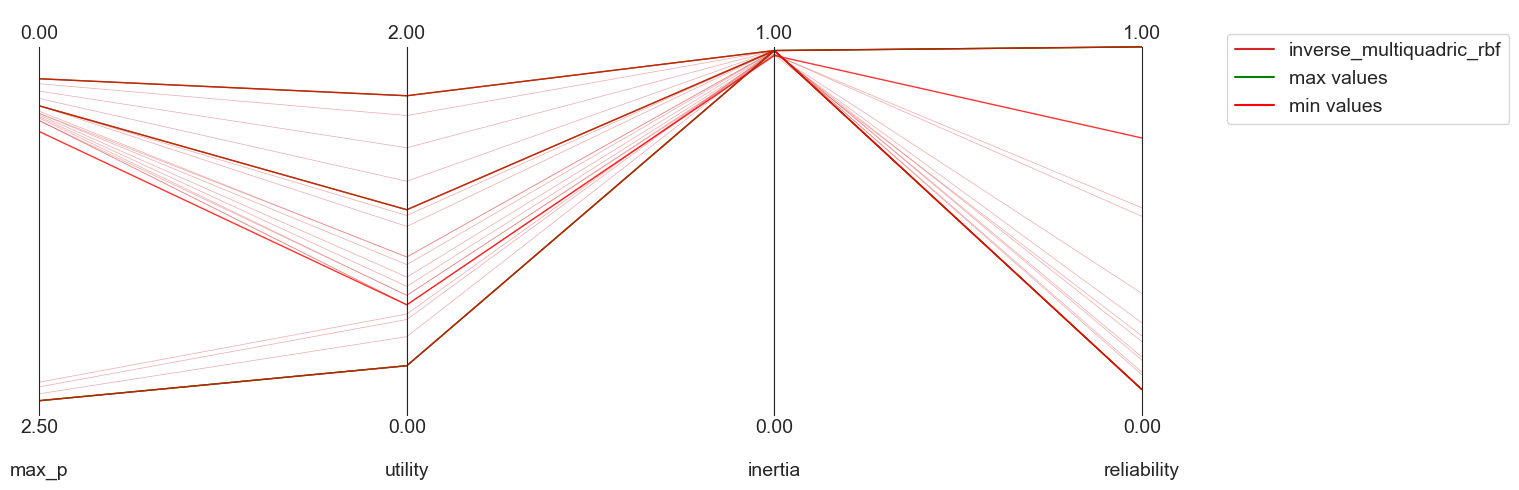

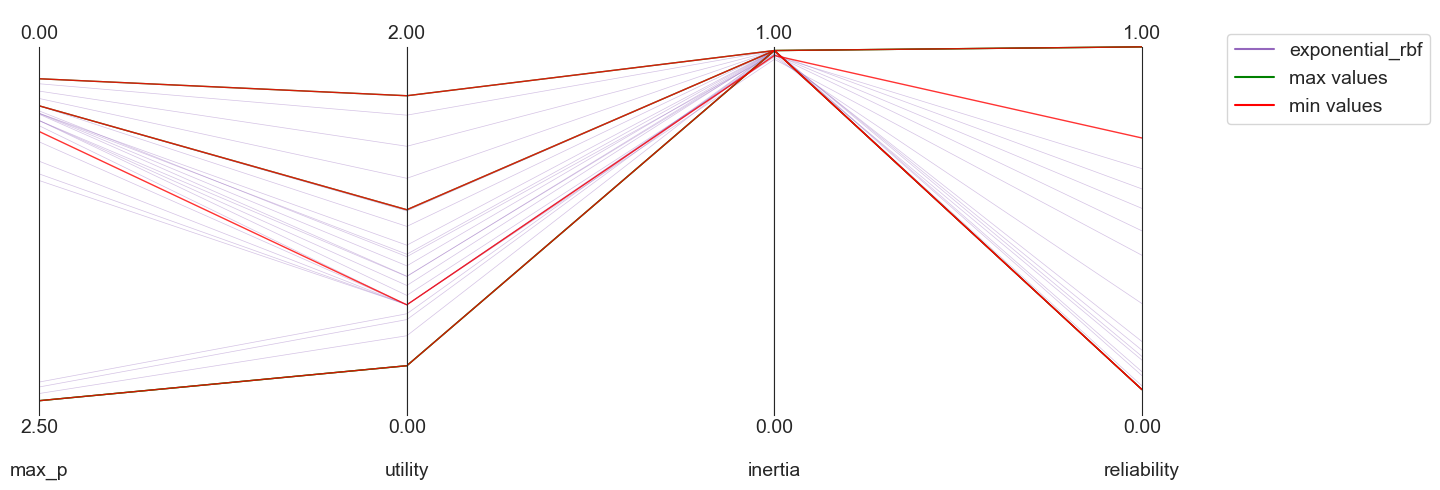

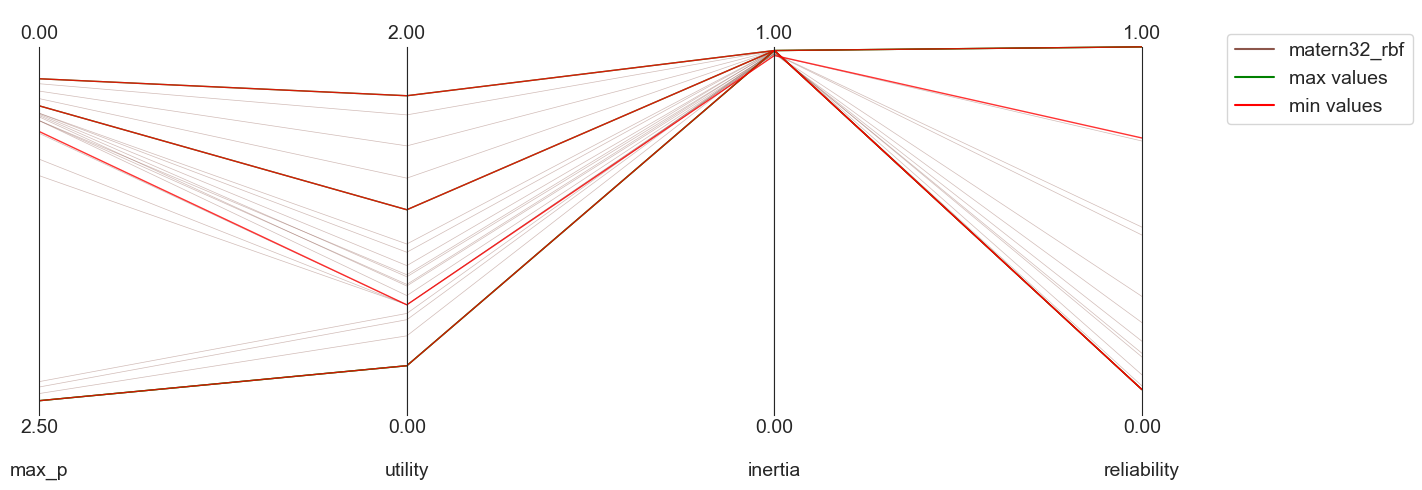

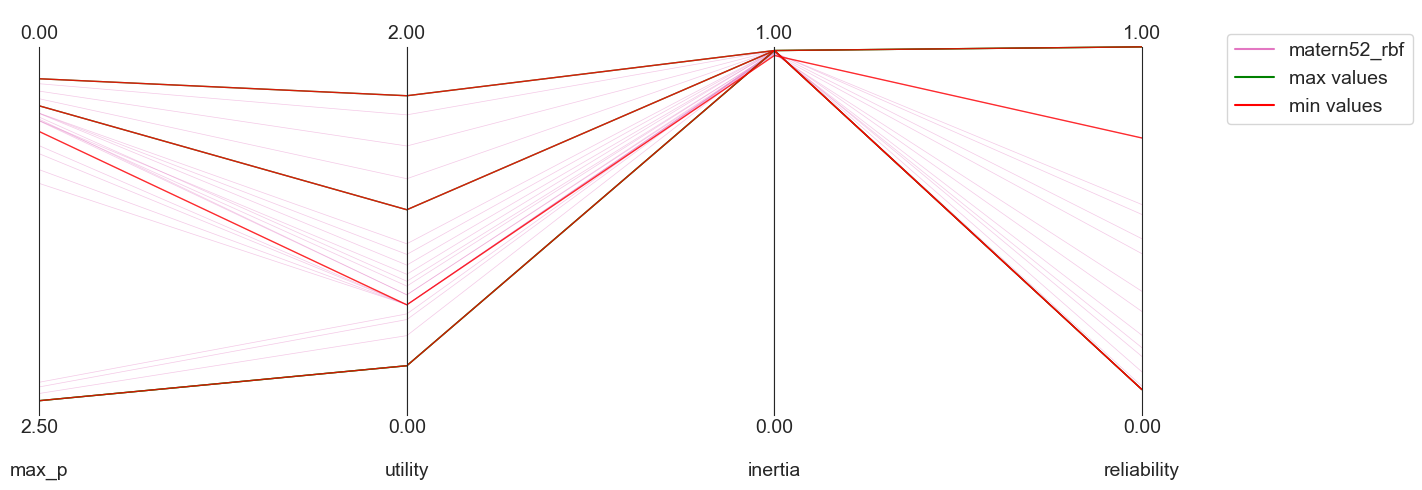

In [6]:
# for entry in rbfs:
for (k, v), c in zip(pareto_sets.items(), sns.color_palette()):
    #     name = entry.__name__
    df_rbf = pareto_sets[name].copy()

    mins = []
    maxs = []

    for i in df_rbf.idxmax():
        maxs.append(df_rbf.loc[i])
    for i in df_rbf.idxmin():
        mins.append(df_rbf.loc[i])

    df_min = pd.DataFrame(mins)
    df_max = pd.DataFrame(maxs)

    limits = get_limits(df_rbf)
    limits.loc[0] = [
        0,
        0,
        0,
        0,
    ]
    limits.loc[1] = [2.5, 2.0, 1, 1]
    axes = ParallelAxes(limits, rot=0)
    axes.plot(v, label=k, lw=0.5, color=c, alpha=0.4)
    axes.plot(df_max, label="max values", lw=1, color="green", alpha=0.8)
    axes.plot(df_min, label="min values", lw=1, color="red", alpha=0.8)

    axes.invert_axis("max_p")
    axes.legend()

# plt.savefig(f'figs/{name}/{name}_parcoords.jpg')

In [7]:
for k, v in pareto_sets.items():
    v["rbf"] = k

combined = pd.concat(pareto_sets.values())
combined.head()

,max_p,utility,inertia,reliability,rbf
0,0.460127,0.808575,0.9896,0.1500,original_rbf
1,0.216401,1.734761,0.9900,0.0700,original_rbf
2,2.400223,0.269395,0.9900,1.0000,original_rbf
3,0.487121,0.708736,0.9816,0.2242,original_rbf
4,0.643229,0.600153,0.9797,0.7832,original_rbf


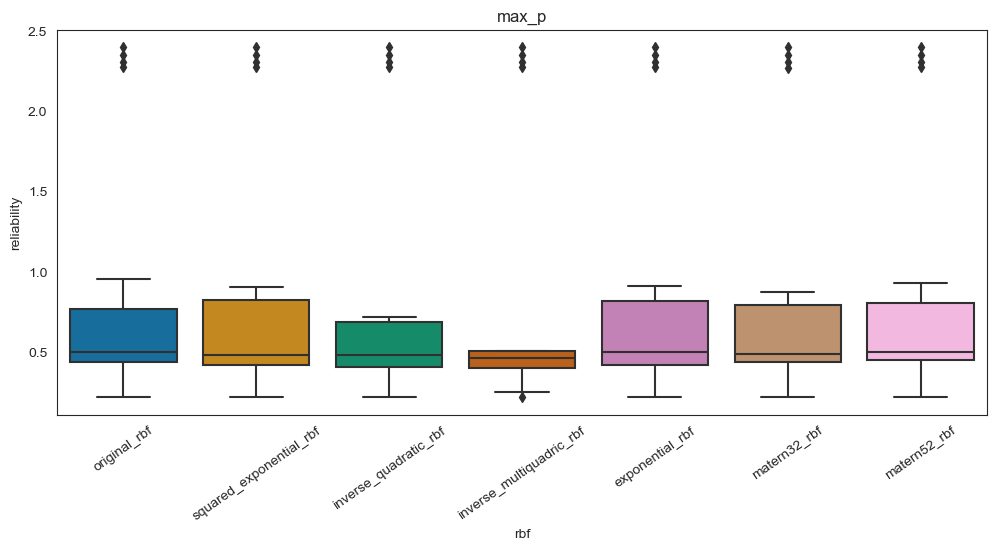

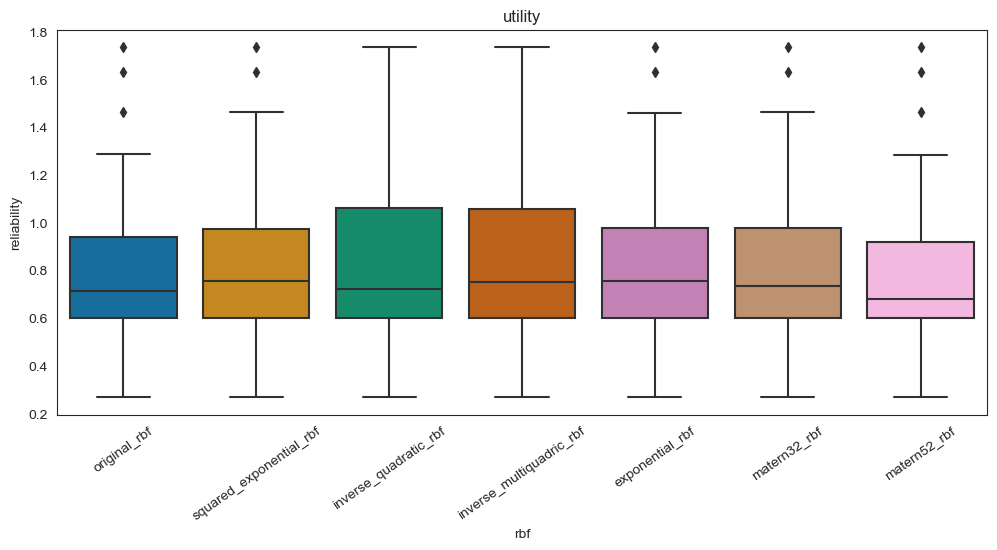

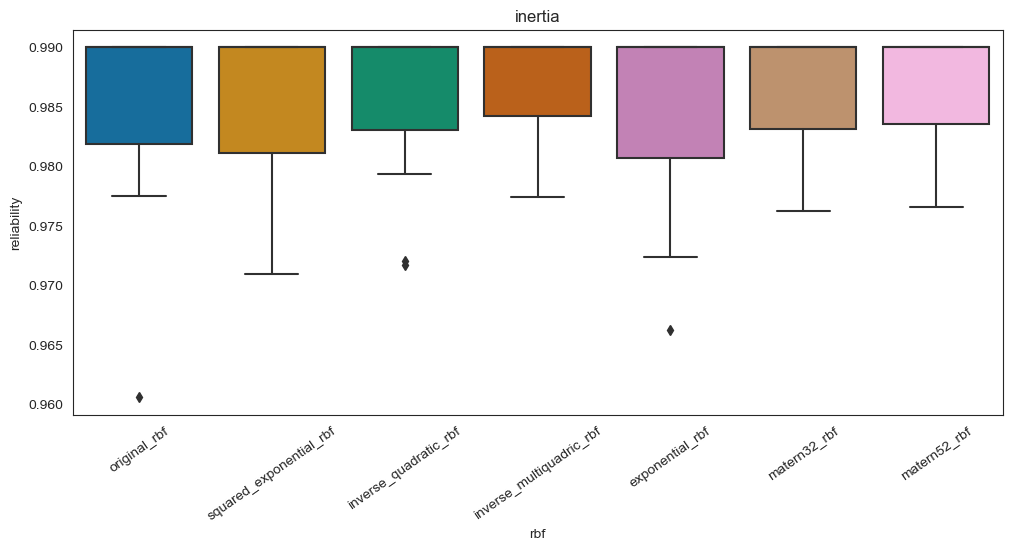

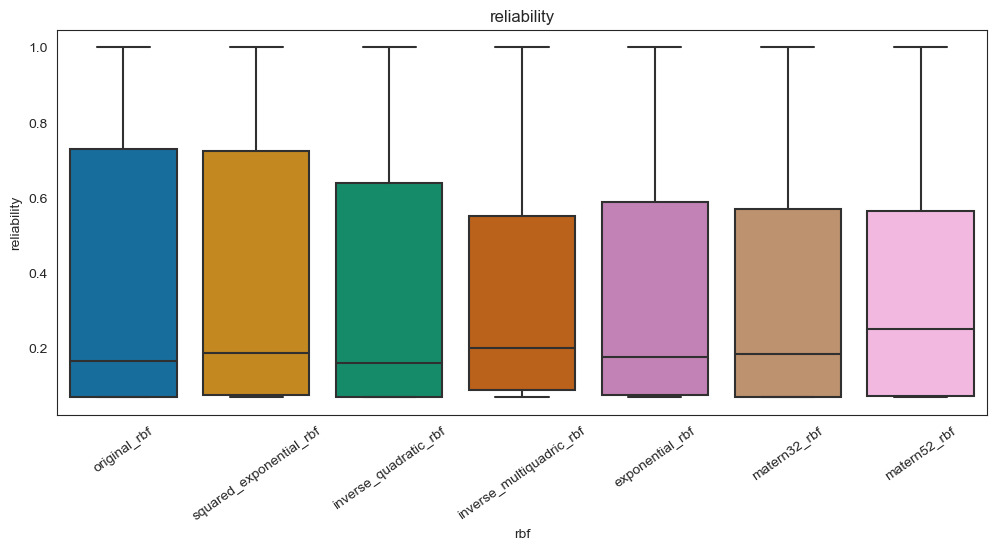

In [8]:
l = []
for n in rbfs:
    l.append(n.__name__)

for entry in combined.columns[0:-1]:
    data = combined[[entry, "rbf"]]
    sns.boxplot(data=data, y=entry, x="rbf", order=l, palette="colorblind")
    plt.title(entry)
    plt.ylabel("reliability")
    plt.xticks(rotation=35)
    plt.show()

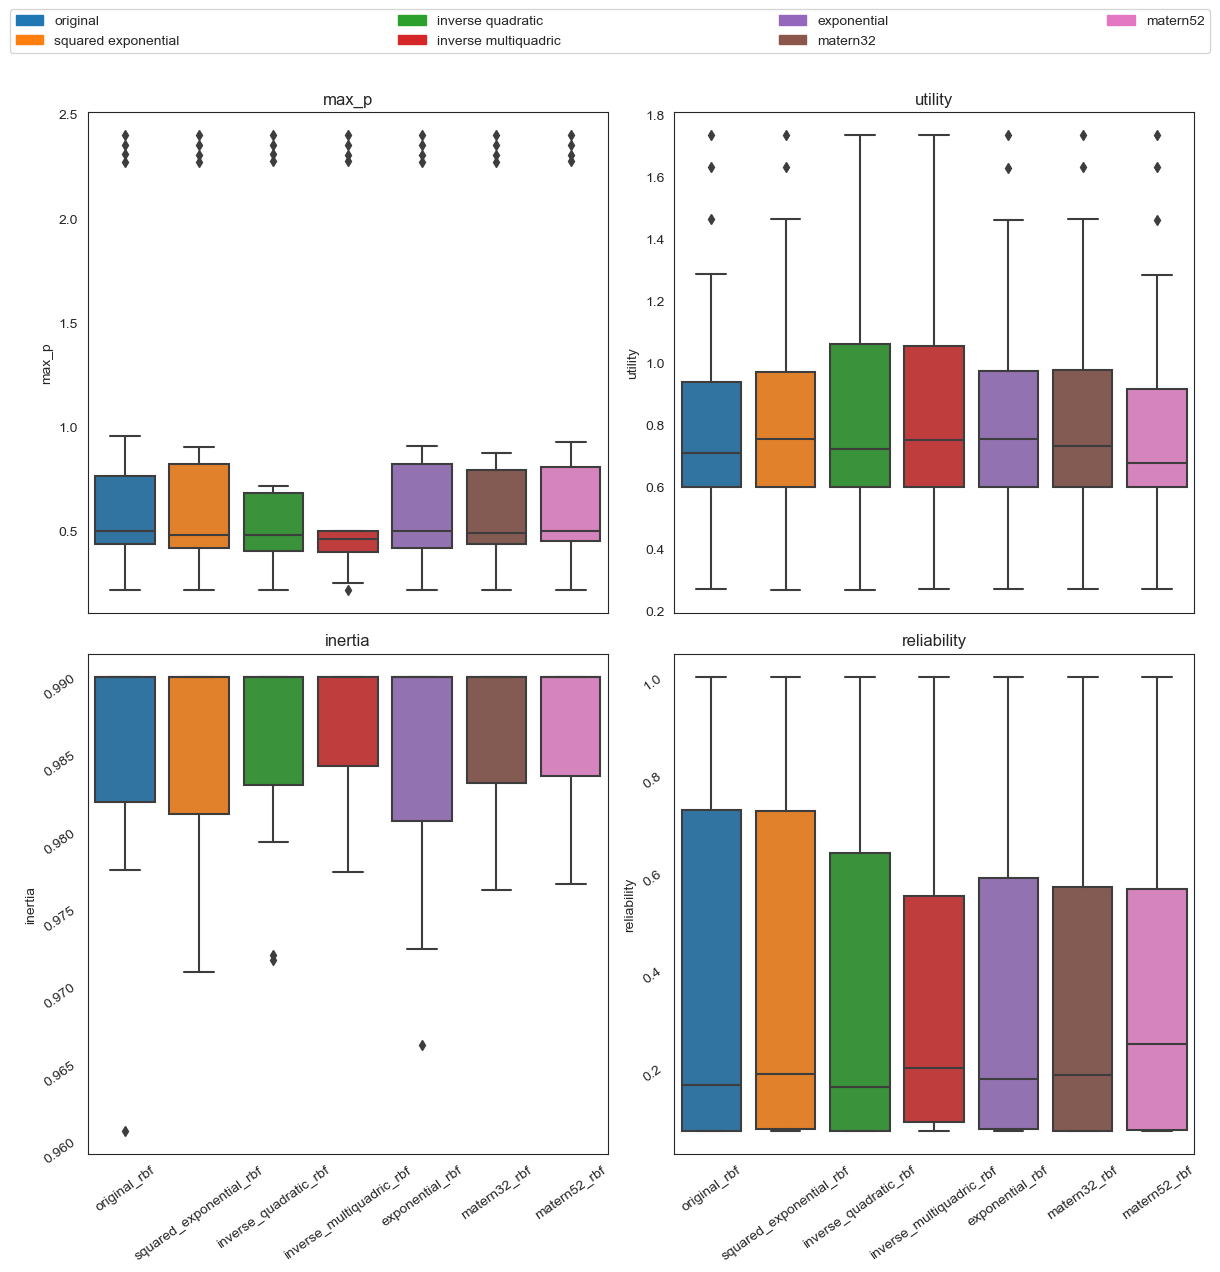

In [9]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(12, 12))

x = 0
for i, entry in enumerate(combined.columns[0:-1]):
    x = i / 2
    data = combined[[entry, "rbf"]]
    if i % 2:
        sns.boxplot(ax=ax[int(x), 1], data=data, y=entry, x="rbf", order=l)
        ax[int(x), 1].set_title(entry)
        # ax[int(x),1].set_ylabel("Reliability")
        ax[int(x), 1].set_xlabel(None)
    else:
        sns.boxplot(ax=ax[int(x), 0], data=data, y=entry, x="rbf", order=l)
        ax[int(x), 0].set_title(entry)
        ax[int(x), 0].set_xlabel(None)
    ax[1, 0].tick_params(labelrotation=35)
    ax[1, 1].tick_params(labelrotation=35)

# make a single figure level legend
handles = []
colors = sns.color_palette()
for (i, rbf) in enumerate(rbfs):
    # dirty hack to remove underscore from name of rbf
    name = " ".join(rbf.__name__.split("_")[0:-1])
    patch = mpatches.Patch(color=colors[i], label=name)
    handles.append(patch)

fig.legend(
    handles=handles,
    ncol=4,
    bbox_to_anchor=(0, 1.02, 1, 0.2),
    loc="lower left",
    mode="expand",
    borderaxespad=0,
)
fig.tight_layout()


fig.tight_layout()
plt.savefig(f"../figs/box_plots_shallow_lake_compare.png", bbox_inches="tight")
plt.savefig(f"../figs/box_plots_shallow_lake compare.pdf", bbox_inches="tight")